In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

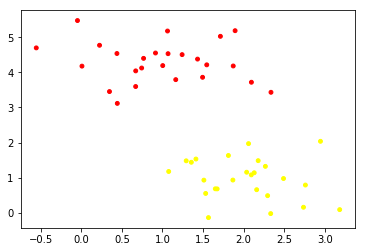

In [30]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=15,cmap="autumn")

In [4]:
print(len(X))

50


In [31]:
model=SVC(kernel="linear",C=0.1)
model.fit(X,y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
#Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
        # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.plot(model.support_vectors_[:,0],model.support_vectors_[:,1],"x",color="blue")
#     ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], s=500, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

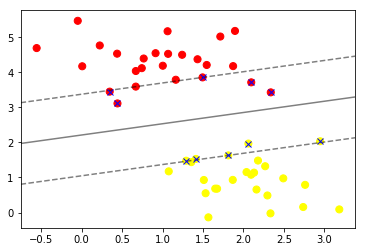

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Ta thấy model sẽ được train để timf ra được đường thẳng phân chia 2 dữ liệu, đường thẳng đó có bằng 0, những điểm ở trên đường thẳng sẽ có giá trị + và ở dưới có giá trị âm (thực chất là khoảng cách từ 1 điểm đến đường thẳng bawgnf 0)
Trên hình ta vẽ ra đường thẳng ax+by=0(0 tương ứng với giá trị của P. decision_function(phương trình đường thẳng phân chia)

In [8]:
print(model.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


Ta thấy các điểm điểm ở xa những điểm support-vector thì không ảnh hưởng đến việc tìm đường thawgnr, dó đó ta có thể giảm giữu liêu train nhưng vẫn giữ được đô chính xác đường thẳng phân chia

In [9]:
r = np.exp(-(X ** 2).sum(1))
print(X[0])
print(r[0])

[1.41281595 1.5303347 ]
0.013062977609901308


# Dữ liệu không tuyến tính

### Với dữ liệu không tuyến tính ta thấy rằng việc dùng linear là không thể tách được dữ liệu

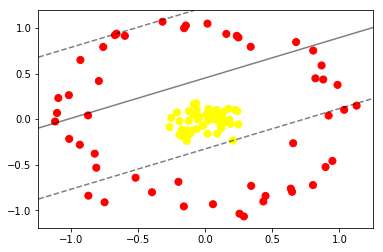

In [55]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Ta sẽ đưa dữ liệu về 3 chiều hình quả chuông với trục z

In [56]:
r = np.exp(-(X ** 2).sum(1))

In [12]:
from mpl_toolkits import mplot3d


In [58]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

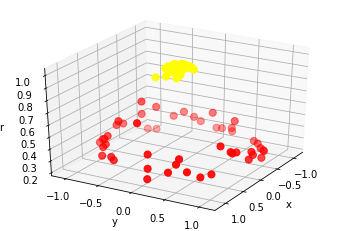

In [59]:
plot_3D()

Để có thể chuyển dữ liệu về nhiều chiều hơn ta sử dụng #kernel trick 
Nó sẽ không làm tawgn chiều của dữ liệu(tránh gây sự phức tạp khi có nhiều dữ liệu) 
Hầu hết ta sẽ sử dụng kernel rbf

In [60]:
clf=SVC(kernel="rbf",gamma=0.1,C=100)
clf.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

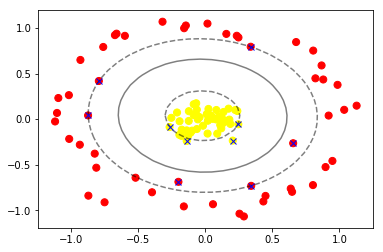

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

In [121]:
def devision_plot_3D(elev=30, azim=30, X=X, y=y,model=clf):
    
    ax = plt.subplot(projection='3d')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim,ylim)
    # create grid to evaluate model
#     x1 = np.linspace(xlim[0], xlim[1], 30)
#     y1 = np.linspace(ylim[0], ylim[1], 30)
    x1 = np.linspace(-2, 2, 30)
    y1 = np.linspace(-2,2, 30)
    y11, x11 = np.meshgrid(y1, x1)
    xy = np.vstack([x11.ravel(), y11.ravel()]).T
    P = model.decision_function(xy).reshape(-1,1)
    P1=model.decision_function(X).reshape(-1,1)
    ax.scatter3D(X[:, 0], X[:, 1], P1, c=y, s=50, cmap='autumn')
    ax.scatter3D(xy[:, 1], xy[:, 0], P, cmap='RdBu')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

(0.0, 1.0) (0.0, 1.0)


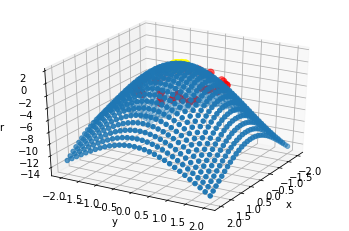

In [122]:
devision_plot_3D(30,30)

In [131]:
print(X[0])
Xtest=np.array([0.554,0])
print(clf.predict(Xtest.reshape(-1,2)))

[0.23339991 0.91553949]
[1]


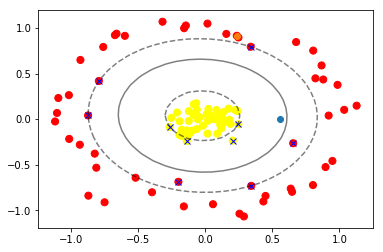

In [132]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');
plt.plot(Xtest[0],Xtest[1],"o")
plt.plot(X[0][0],X[0][1],"o")

# Softening margins

### Hard margin là cố gắng lấy margin rộng nhất mà không bị lạc điểm nào vào mergin
### Soft margin là có thể cho vài điểm lạc vào mergin đồng nghĩa là margin nó sẽ rộng hơn

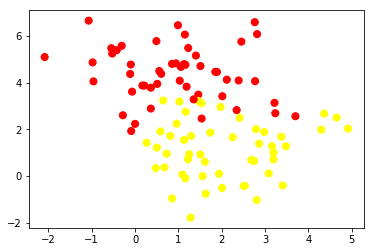

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Nếu dữ liệu bị overlaping như thế này thì sao, lúc này Hệ số C sẽ có tác dụng, nếu C càng to thì nó càng cho ít điểm nằm trong phần margin, điều đó đồng nghĩa là margin sẽ rất hẹp(hình bên trái), nếu C nhỏ thì nó sẽ cho vài điểm nằm trong phần margin(hình phải) nhưng có vẻ đường phân cách bên phải là tốt hơn

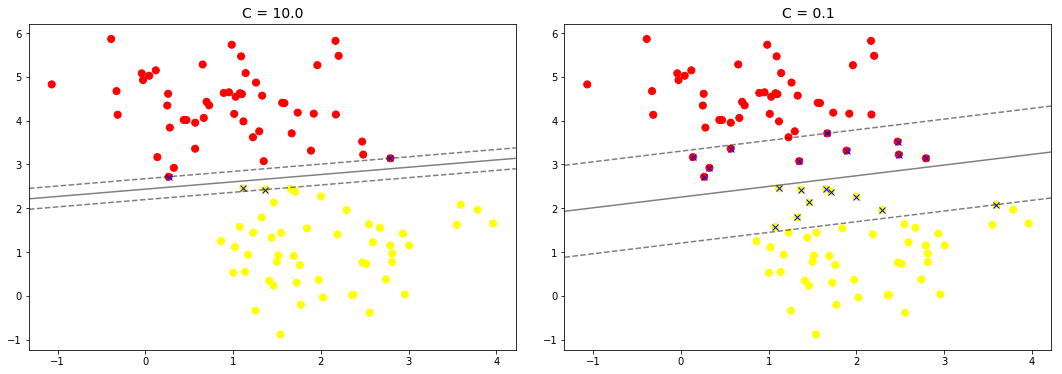

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Face Recoginition

In [133]:
from sklearn.datasets import fetch_lfw_people

In [136]:
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.target)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
[1 3 3 ... 7 3 5]


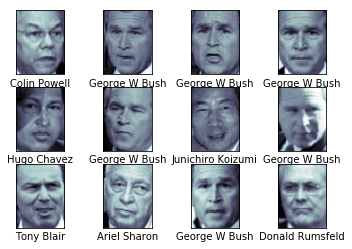

In [141]:
fig, ax=plt.subplots(3,4)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap="bone")
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])
    

In [146]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as randomized_svd
from sklearn.pipeline import make_pipeline

In [148]:
pca=randomized_svd(n_components=150,random_state=42)
#balanced: dữ liệu bị không cân bằng
svc=SVC(kernel="rbf",class_weight="balanced")
model=make_pipeline(pca,svc)

In [151]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target)

In [155]:
print(Xtrain.shape,ytrain.shape)

(1011, 2914) (1011,)
[134.33333 135.33333 141.33333 ... 195.33333 203.33333 216.     ]


In [174]:
from sklearn.model_selection import GridSearchCV
para={'svc__C':[1,5,10,15],
     'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,para)

In [175]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svc',
                                        SVC(C=3, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.0001,
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            rando

In [176]:
print(grid.best_params_)

{'svc__gamma': 0.0001, 'svc__C': 5}


In [177]:
model=grid.best_estimator_

In [178]:
yfit=model.predict(Xtest)

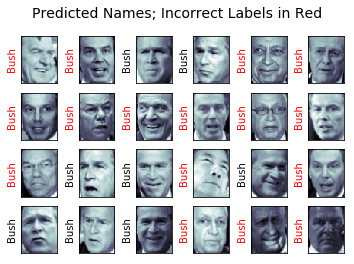

In [179]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);